In [52]:
import os
import numpy as np
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "./config/windy-nova-364604-7a2df3513239.json"
from google.cloud import vision
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [24]:
path = "/Users/kyoma/Desktop/WechatIMG202.png"

client = vision.ImageAnnotatorClient()
with io.open(path, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)
response = client.document_text_detection(image=image)
print()

## example

In [25]:
blocks = response.full_text_annotation.pages[0].blocks
blocks

[bounding_box {
  vertices {
    x: 39
    y: 9
  }
  vertices {
    x: 842
    y: 9
  }
  vertices {
    x: 842
    y: 82
  }
  vertices {
    x: 39
    y: 82
  }
}
paragraphs {
  bounding_box {
    vertices {
      x: 39
      y: 9
    }
    vertices {
      x: 420
      y: 9
    }
    vertices {
      x: 420
      y: 29
    }
    vertices {
      x: 39
      y: 29
    }
  }
  words {
    property {
      detected_languages {
        language_code: "en"
        confidence: 1.0
      }
    }
    bounding_box {
      vertices {
        x: 39
        y: 9
      }
      vertices {
        x: 57
        y: 9
      }
      vertices {
        x: 57
        y: 29
      }
      vertices {
        x: 39
        y: 29
      }
    }
    symbols {
      bounding_box {
        vertices {
          x: 39
          y: 9
        }
        vertices {
          x: 45
          y: 9
        }
        vertices {
          x: 45
          y: 29
        }
        vertices {
          x: 39
          y: 29


## test

In [55]:
img = cv2.imread(path)

In [118]:
def detect_color(img):
    ### method 1
    # hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # return hsv[:,:,0]
    
    ### method 2
    h_red = cv2.calcHist([img], [2], None, [256], [0,256])
    h_green = cv2.calcHist([img], [1], None, [256], [0,256])
    h_blue = cv2.calcHist([img], [0], None, [256], [0,256])
    
    # print(h_red)

    h_red[200:] = 0
    h_green[200:] = 0
    h_blue[200:] = 0
    
    count_red = h_red.sum()
    count_green = h_green.sum()
    count_blue = h_blue.sum()
    
    # print(count_red,count_green,count_blue)

    sum_red = np.sum(h_red * np.c_[0:256])
    sum_green = np.sum(h_green * np.c_[0:256])
    sum_blue = np.sum(h_blue * np.c_[0:256])

    # Compute the average - divide sum by count.
    avg_red = sum_red / count_red
    avg_green = sum_green / count_green
    avg_blue = sum_blue / count_blue
    
    print('Text RGB average is about: {}, {}, {}'.format(avg_red, avg_green, avg_blue))

In [120]:
# tmp_img_path = "/Users/kyoma/Downloads/tmp/79.png" # black
tmp_img_path = "/Users/kyoma/Downloads/tmp/276.png" # blue
# tmp_img_path = "/Users/kyoma/Downloads/tmp/350.png"
tmp_img = cv2.imread(tmp_img_path)
detect_color(tmp_img)

Text RGB average is about: 43.55223880597015, 108.73846153846154, 163.3728813559322


In [56]:
    rets = []
    blocks = response.full_text_annotation.pages[0].blocks
    i = 0
    for block in blocks:
        for paragraph in block.paragraphs:
            font_size_list = []
            line_space_list = []
            last_y = 0
            text = ""
            # get test
            for word in paragraph.words:
                for symbol in word.symbols:
                    end = ""
                    type_ = str(symbol.property.detected_break.type_)
                    if type_=="BreakType.SPACE" or type_=="BreakType.EOL_SURE_SPACE" or type_=="BreakType.SURE_SPACE":
                        end = " "

                    if not len(line_space_list):
                        last_y = symbol.bounding_box.vertices[0].y
                        
                    if type_=="BreakType.EOL_SURE_SPACE" or type_=="BreakType.LINE_BREAK":
                        # print(symbol.bounding_box.vertices[0].y-last_y)
                        line_space_list.append(symbol.bounding_box.vertices[0].y-last_y)
                        last_y = symbol.bounding_box.vertices[0].y
                        # print(last_y)
                        
                    # print(dir(symbol.property))
                    # print(symbol.text, end=end)
                    tmp_img = img[symbol.bounding_box.vertices[0].y:symbol.bounding_box.vertices[2].y,symbol.bounding_box.vertices[0].x:symbol.bounding_box.vertices[1].x, :]
                    cv2.imwrite(f"/Users/kyoma/Downloads/tmp/{i}.png", tmp_img)
                    # plt.close()
                    i+=1
                    text += symbol.text + end
                    font_size_list.append(symbol.bounding_box.vertices[1].x - symbol.bounding_box.vertices[0].x)
            # get box
            vertices = ([(vertex.x, vertex.y) for vertex in paragraph.bounding_box.vertices])
            font_size = np.median(np.array(font_size_list))
            
#             if len(line_space_list):
            print(line_space_list[1:])
            line_space = np.median(np.array(line_space_list[1:])) / font_size
            if np.isnan(line_space) or len(line_space_list)<=1 or line_space < 1.1 or line_space > 5:
                line_space = 1.5
            # print(line_space_list)
            # rets.append([text, vertices, font_size, line_space])
            rets.append([font_size, line_space])
            print([font_size, line_space])

    # print(rets)

[]
[10.0, 1.5]
[]
[10.0, 1.5]
[35, 36]
[9.0, 3.9444444444444446]
[]
[10.5, 1.5]
[]
[10.0, 1.5]


In [21]:
np.median(np.array([0, 35]))

17.5

In [41]:
img = mpimg.imread(path)
img.shape

(405, 859, 4)

In [36]:
tmp_img = img

In [28]:
tmp_img[207:418,16:489, :] = 0.5

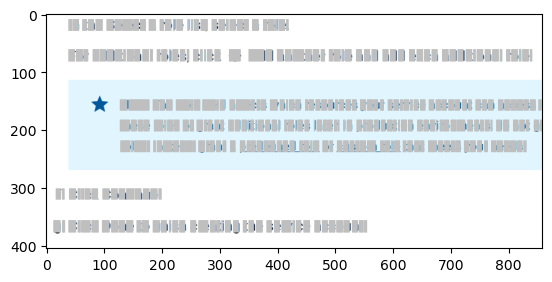

In [38]:
plt.imshow(tmp_img)

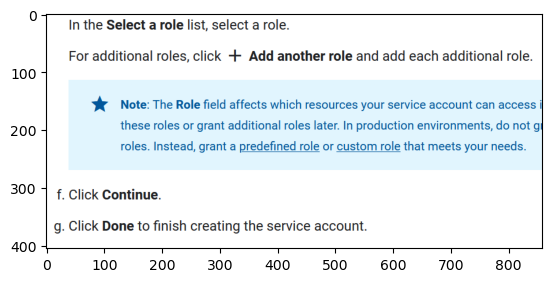

In [42]:
plt.imshow(img)